In [288]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [289]:
def load_datasets(folder_path):
    folder_path = "./archive"  # Hardcoded path to ./archive
    data_dict = {}  # Create an empty dictionary to store DataFrames
    csv_files = os.listdir(folder_path)  # List all files in the folder
    for file in csv_files:
        if file.endswith(".csv"):  # Select only CSV files
            full_path = os.path.join(folder_path, file)  # Full path to file
            df = pd.read_csv(full_path)  # Read CSV into DataFrame
            data_dict[file] = df  # Add to dictionary
    return data_dict

In [290]:
def explore_dataset(df):
    print("\n---First 5 rows---")
    print(df.head())  # Display first 5 rows
    
    print("\n---Column names---")
    print(df.columns)  # List column names
    
    print("\n---Data types---")
    print(df.dtypes)  # Display column data types
    
    print("\n---Missing values---")
    print(df.isnull().sum())  # Show missing values per column
    
    print("\n---Summary stats---")
    print(df.describe())  # Summary statistics for numerical columns
    print('\n')


In [291]:
# function lists all available datasets (i.e., print the keys from the `data_dict`).
def list_available_datasets(data_dict):
    print("\n---Available datasets---\n")
    for dataset in data_dict.keys():  # Iterate over each file name in the dictionary
        print(dataset)  # Print the file name

In [292]:
# select a dataset from the available list and explore it
def select_and_explore_dataset(data_dict):
    list_available_datasets(data_dict) #lists all datasets in data_dict
    ds_choice = input("\nSelect a dataset to explore: ")
    if ds_choice in data_dict.keys(): #checks if users choice is in data_dict
        print(f"\n---Exploring {ds_choice}---")
        explore_dataset(data_dict[ds_choice]) #if the users choice exists, pass the dataframe to explore_dataset
    else:
        print("---The dataset you selected does not exist.---")

In [293]:
# Merge two datasets (`results.csv` and `races.csv`) based on common column like `raceId`.
def merge_results_races(data_dict):
    results_df = data_dict["results.csv"]  # Loads race results data from the dict (results.csv)
    races_df = data_dict["races.csv"]  # Load the race details data from the dictionary (races.csv)
    merged_race_data = pd.merge(results_df, races_df, on='raceId', how="left")  
    return merged_race_data  # Return the merged DataFrame

In [294]:
# handle missing data in the merged dataset
def clean_data(dataframe):
    # Replace placeholder values '\N' with NaN
    dataframe.replace({'\\N': pd.NA}, inplace=True)
    columns_to_remove = [
        'resultId', 'time_x', 'fastestLapTime', 'fastestLapSpeed', 
        'number', 'rank', 'url', 
        'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 
        'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 
        'sprint_date', 'sprint_time', 'date', 'time_y'
    ]
    dataframe.drop(columns=columns_to_remove, errors='ignore', inplace=True)  # Dropping columns that aren't useful

    essential_columns = ['raceId', 'driverId', 'grid', 'laps', 'year', 'positionOrder']
    dataframe.dropna(subset=essential_columns, inplace=True)  # Dropping rows with missing data in the essential columns
    return dataframe

In [295]:
# Convert data types in relevant columns
def convert_data_types(df_cleaned):
    cols_to_convert = ['grid', 'laps', 'points']
    for col in cols_to_convert:
        df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')
    return df_cleaned

In [296]:
def select_features(df_cleaned):
    driver_group = df_cleaned.groupby('driverId')  # Groups all rows with same driverId
    df_cleaned['driver_rolling_avg_points'] = driver_group['points'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
    
    constructor_group = df_cleaned.groupby('constructorId')
    df_cleaned['constructor_rolling_avg_points'] = constructor_group['points'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)

    # Keeping 'positionOrder' for analysis
    columns_to_keep = [
        'driverId', 'constructorId', 'grid', 'laps', 'points', 'year', 'circuitId', 'driver_rolling_avg_points', 
        'constructor_rolling_avg_points', 'positionOrder'
    ]

    df_selected = df_cleaned[columns_to_keep]
    return df_selected

In [297]:
def explore_data_heatmap(df_selected):
    # Select only the columns needed for heatmap
    heatmap_data = df_selected[['grid', 'positionOrder']]

    # Drop rows where 'positionOrder' or 'grid' is missing
    heatmap_data.dropna(subset=['grid', 'positionOrder'], inplace=True)

    # Filter to only include grid and positionOrder values from 1 to 20
    heatmap_data = heatmap_data[(heatmap_data['grid'] >= 1) & (heatmap_data['grid'] <= 20)]
    heatmap_data = heatmap_data[(heatmap_data['positionOrder'] >= 1) & (heatmap_data['positionOrder'] <= 20)]

    # Create a pivot table counting the occurrences of each combination of grid and final position
    pivot = heatmap_data.pivot_table(index='positionOrder', columns='grid', aggfunc='size', fill_value=0)

    # Ensure the pivot table only has indices and columns from 1 to 20
    pivot = pivot.loc[1:20, 1:20]

    # Create a heatmap using Seaborn
    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
    plt.title('Heatmap of Grid Position vs. Final Position (P1 - P20)')
    plt.xlabel('Starting Position')
    plt.ylabel('Final Position')
    plt.show()


In [298]:
# # Load the datasets
# data_dict = load_datasets('./archive')

# # Merge results.csv and races.csv datasets
# merged_data = merge_results_races(data_dict)

# # Clean the merged dataset
# cleaned_data = clean_data(merged_data)

# # Convert data types in relevant columns
# cleaned_data = convert_data_types(cleaned_data)

# # Select relevant features from the cleaned dataset
# df_selected = select_features(cleaned_data)



C:\Users\Nate Klingbeil\AppData\Local\Temp\ipykernel_10748\2436285834.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heatmap_data.dropna(subset=['grid', 'positionOrder'], inplace=True)


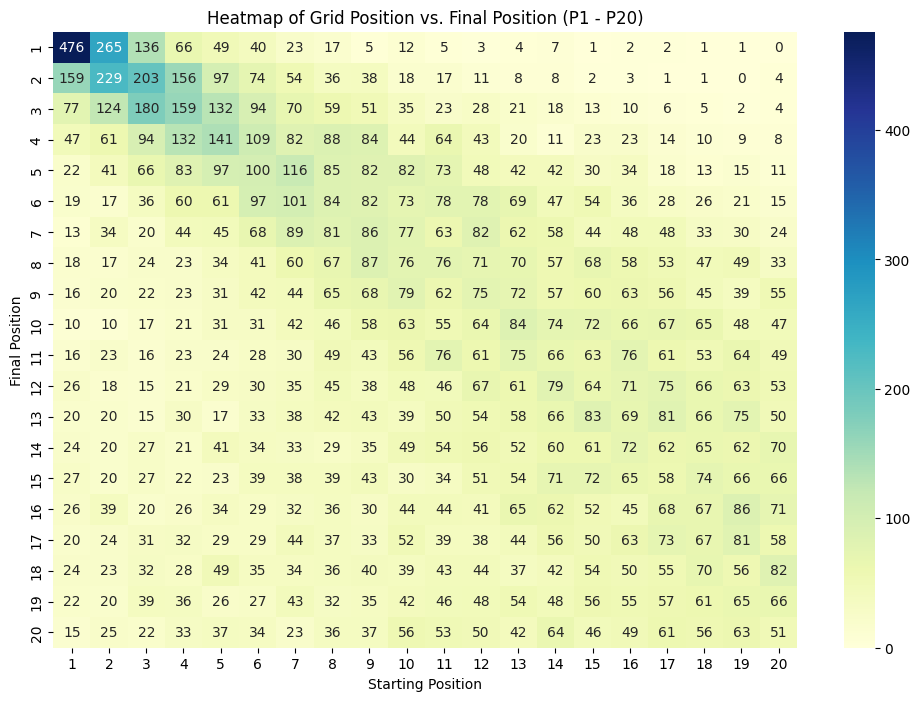

In [299]:
if __name__ == "__main__":
    # Load datasets
    data_dict = load_datasets('./archive')

    # Clean and merge data
    merged_data = merge_results_races(data_dict)
    cleaned_data = clean_data(merged_data)
    converted_data = convert_data_types(cleaned_data)

    # Select relevant features for analysis
    selected_data = select_features(converted_data)

    # Explore data with heatmap
    explore_data_heatmap(selected_data)